# Rainfall Prediction - Weather Forecasting

## Evaluation Project- 8

## Summary

### Angle 1- Classification Problem of Predicting whether or not it would rain tomorrow

- On first inspection, it was clear that Dataset was riddled with nan values.
- We had to conduct EDA only after all these issues were resolved.
- Seperated the categorical and Numerical data columns by way of datatype, as the dtype was accurate already.
- Crosschecked the above wiht the number of vunique values in each column as well.
- Filled the nan values in the catagorical data columns with the mode and that of the numerical columns with the mean.
- During EDA among other things, it was clear that the dataset with reference to the target label-RainTomorrow, was imbalanced.
- Used SMOTE to balance out the dataset by way of oversampling.
- We compared the Accuraacy scores of 4 ML algorithms to find the best model and the random state in predicting the label.
- We scaled the data using Standard scalar.
- A complex decision was made using Kbest feature selection to weed out about 8 columns. this decision was based on shared entropy values and the lowesr entrpy values.
- Random Forest Classifier was the best model to predict the target.
- We then used RandomsearchCv to do the Hyper Parameter tuning.
- On finding the best paramenters, we ran the model with the newly found params to get an average Cross validation score of 91.3%
- plotted the ROC graph, to find the Area under ROC as 0.9473 or 94.73%
- Model built successfully.
- Below Are the findings of Angle 1

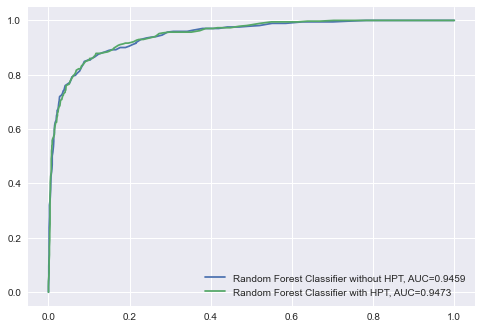

In [196]:
#set up plotting area
plt.figure(0).clf()

#fit ROC before 

y_predd = RFC.predict_proba(test_x)[:, 1]
fpr1, tpr1, _ = roc_curve(test_y, y_predd)
auc1 = round(roc_auc_score(test_y, y_predd), 4)
plt.plot(fpr1,tpr1,label="Random Forest Classifier without HPT, AUC="+str(auc1))

#fit gradient boosted model and plot ROC curve

y_predd2 = RFC_best.predict_proba(test_x)[:, 1]
fpr2, tpr2, _ = roc_curve(test_y, y_predd2)
auc2 = round(roc_auc_score(test_y, y_predd2), 4)
plt.plot(fpr2,tpr2,label="Random Forest Classifier with HPT, AUC="+str(auc2))

#add legend
plt.legend()

In [200]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFC_best, X_train_res, y_train_res, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.859375   0.89697266 0.94042969 0.93261719 0.9375    ]
Average cross-validation score: 0.91337890625


### Angle2- Regression problem of predicting the total amount of Rainfall in the area.

- The Cleaned Data was used from Angle11
- We continued from the EDA where we left off with Angle1
- Data was scaled using standard scalar
- Used KBest feature selection method and dropped the last 5 columns accordingly.
- The results of4 Regression models were compared to predict the best score and randon state, Random Forest Regressor came victorious with a r2score of 0.964884199037022
- for Hyper Parameter Tuning, the results of both GridsearchCv and Randomised searchCv were compared, It was almost the same, Bu GridsearchCV was higher.
- What we see below is a comparison where we find that we have 96.4% accuracy in predicting the actual amount of rainfall.
- again, below is the best fit line of the Predicted vs Actual values, where the slope is ~1
- Hence we can summarise that we built a Good Regression model.
- End of Angle 2

In [404]:
#Comparing Actual and Predicted Values.
compare=pd.DataFrame({'Actual':test_y,'Predicted with only Random forest Reg':pred_y ,'Predicted  WithRandom Forst Reg and HPT':GSCV_pred_y})
compare.round(1)

,Actual,Predicted with only Random forest Reg,Predicted WithRandom Forst Reg and HPT
5439,0.0,0.0,0.0
1191,2.5,2.4,2.4
3852,0.0,0.0,0.0
7556,0.0,0.0,0.0
1841,2.5,2.5,2.5
...,...,...,...
6849,0.0,0.1,0.1
7786,0.0,0.1,0.1
3157,2.5,2.5,2.5
1888,0.8,0.4,0.4


Text(0, 0.5, 'Predicted Y')

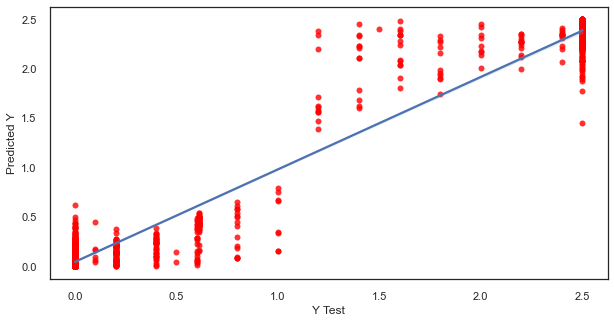

In [407]:
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=GSCV_pred_y,scatter_kws={'color':'red'})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Python Implementation:

In [322]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

sns.set(style = 'white')


from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
import pandas_profiling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import r2_score,accuracy_score,f1_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


### **Note: there were two datasets in the project managment section**
#### Since they both were the same, used one

In [258]:
#Importing Datset
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv",header=0)
df.sample(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8003,2014-01-31,PerthAirport,20.0,30.3,0.0,9.6,10.7,SW,43.0,NNW,WSW,15.0,26.0,55.0,49.0,1007.3,1006.3,6.0,1.0,26.3,28.4,No,No
7299,2011-12-30,PerthAirport,18.0,31.6,0.0,7.8,10.9,WSW,35.0,N,WSW,9.0,20.0,64.0,53.0,1003.3,1003.1,5.0,3.0,26.7,29.4,No,No
2458,2014-09-15,Penrith,12.3,23.2,0.0,NaN,NaN,ENE,28.0,N,SSE,6.0,7.0,62.0,34.0,NaN,NaN,NaN,NaN,17.7,22.7,No,No
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
1850,2014-05-07,Newcastle,11.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,SW,0.0,15.0,68.0,53.0,NaN,NaN,5.0,5.0,15.0,19.0,No,No
2602,2015-02-06,Penrith,16.1,25.7,0.0,NaN,NaN,S,22.0,S,SSE,9.0,9.0,71.0,54.0,NaN,NaN,NaN,NaN,21.5,23.8,No,No
4016,2016-09-26,Williamtown,11.0,23.0,2.2,20.8,NaN,NaN,NaN,W,NaN,19.0,NaN,63.0,27.0,1013.1,1008.3,NaN,NaN,16.5,22.5,Yes,No
745,2010-12-16,Albury,15.1,25.6,0.4,NaN,NaN,W,43.0,W,WSW,20.0,26.0,72.0,21.0,1004.6,1003.8,NaN,NaN,17.6,24.7,No,No
3591,2009-05-04,Wollongong,13.5,22.3,0.0,NaN,NaN,SW,28.0,WNW,SE,13.0,13.0,67.0,62.0,1028.2,1026.0,NaN,NaN,18.6,20.5,No,No
2714,2015-05-29,Penrith,11.7,19.1,0.2,NaN,NaN,WNW,15.0,NW,NaN,6.0,0.0,79.0,67.0,NaN,NaN,NaN,NaN,16.0,19.0,No,No


In [50]:
df.shape 

(8425, 23)

In [57]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [55]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [53]:
df.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [54]:
df.describe(include=[object]).T

,count,unique,top,freq
Date,8425,3004,2011-01-31,5
Location,8425,12,Melbourne,1622
WindGustDir,7434,16,N,713
WindDir9am,7596,16,N,906
WindDir3pm,8117,16,SE,813
RainToday,8185,2,No,6195
RainTomorrow,8186,2,No,6195


In [227]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [259]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### Inferences:
- From the above, we can easily notice that there are alot of missing values in all columns except two.

- There are 7 categorical values of which one is datetime and 16 pure numerical values.
- the date columns has to converted into datetime type. Also seperate the DDMMYYYY
- Because of the missing values, it is difficult to comment about the outliers. we will look at it later.

In [260]:
df[categorical_features].nunique()

Location        12
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [261]:
#Converting Date to DDMMYYYY and seperatinng them
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [262]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [263]:
#Lets look at the missing values in thhe categorical data columns
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
data=df[categorical_features].isnull().sum()
data

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

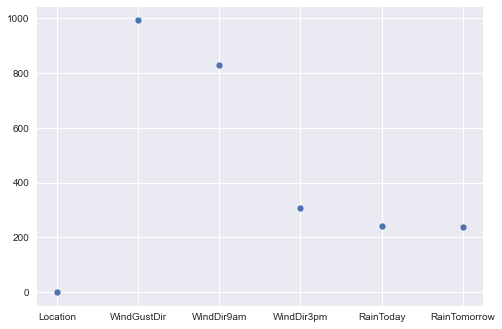

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

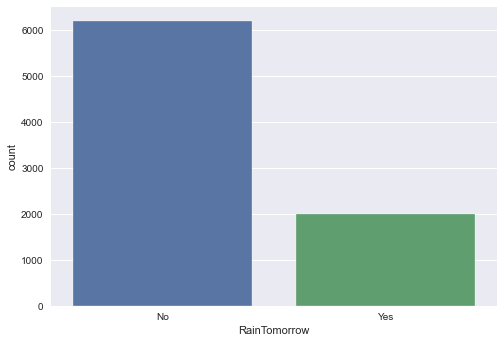

In [265]:
sns.scatterplot(data=data)
plt.show()

sns.countplot(x='RainTomorrow',data=df)

In [266]:
#REplacing all categorical values with the mode of the column
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [267]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

In [268]:
#Outlier Detections
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

In [107]:
#The above plot shows outliers, lets be sure to find the same manually
#finding Outliers using z-score technique. if z>3 it is supposed to be an outlier
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
def z_outlier(df):
    df_z=df
    z=np.abs(zscore(df_z))
    a=int(df_z.size)
    df_z = df_z[(z>3).all(axis=1)]
    print('Percent of data retained = '+ str(int(df_z.size)/a*100),'%')
    return(df_z)

z_outlier(df[features_with_outliers])

Percent of data retained = 0.0 %


,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm


In [269]:
#REplacing Null un numerical data columns with colulm mean values
numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

# Explorative data Analysis using visualisation techniques

### 1. Histogram visualisation of all columns

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Evaporation'}>,
        <AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>],
       [<AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>],
       [<AxesSubplot:title={'center':'Temp3pm'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:

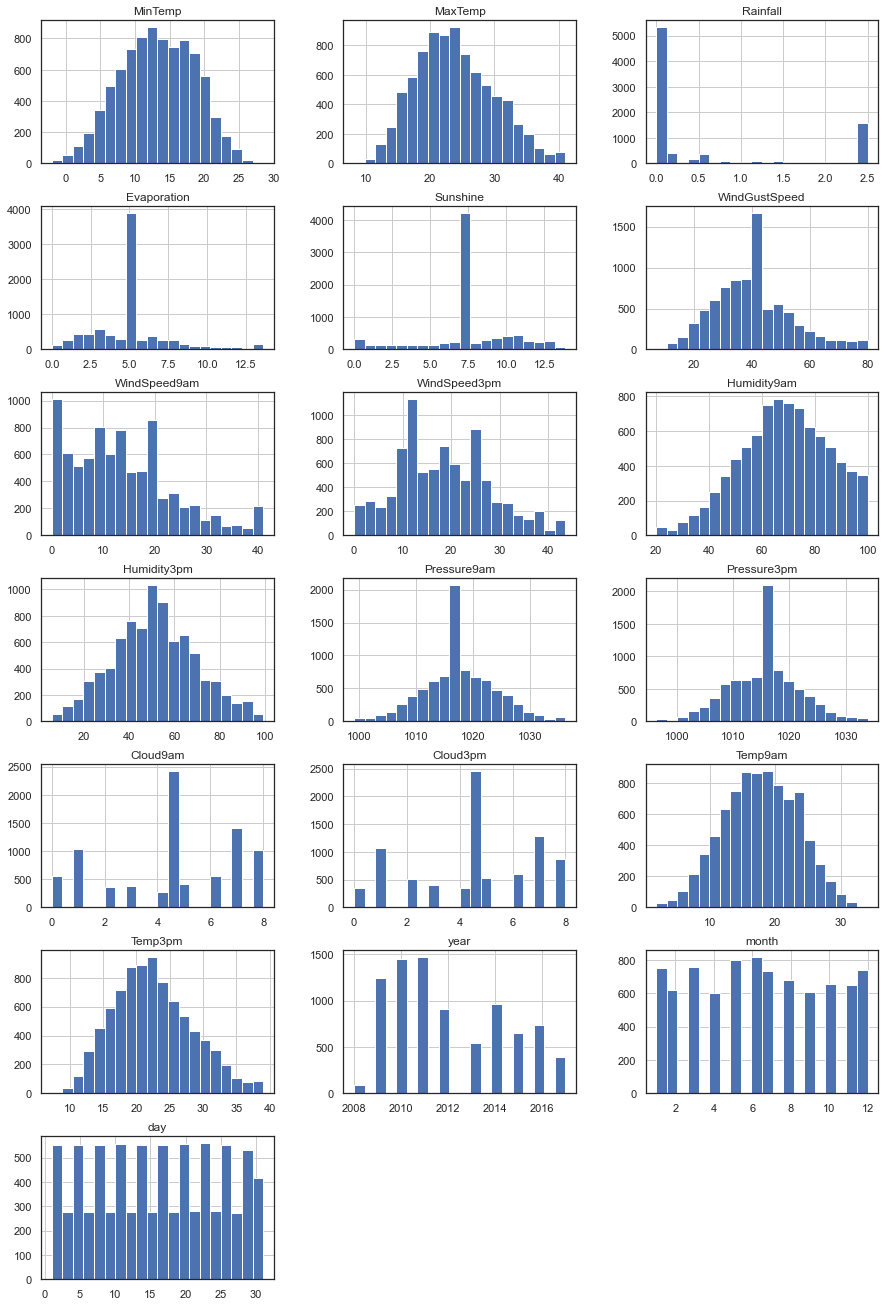

In [112]:
df.hist(figsize=(15,30),grid=True,layout=(9,3),bins=20)

### 2. Analysis of Numerical data columns

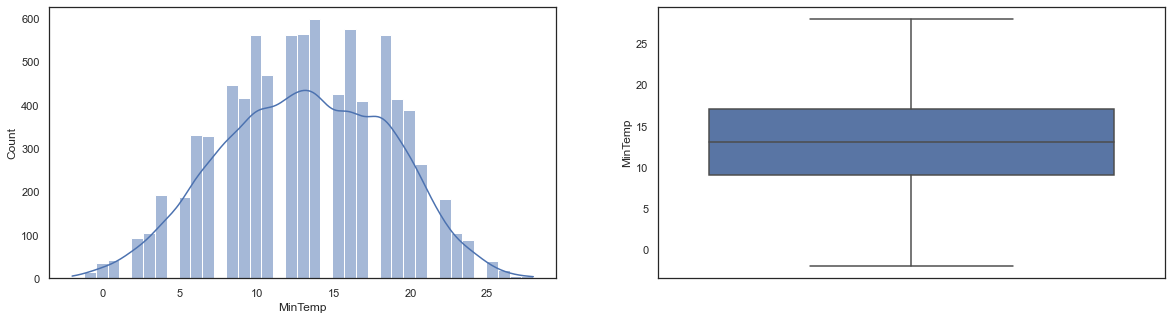

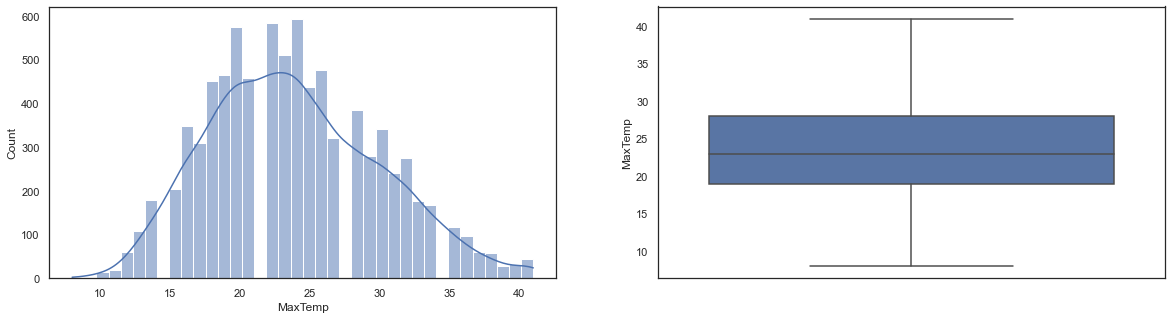

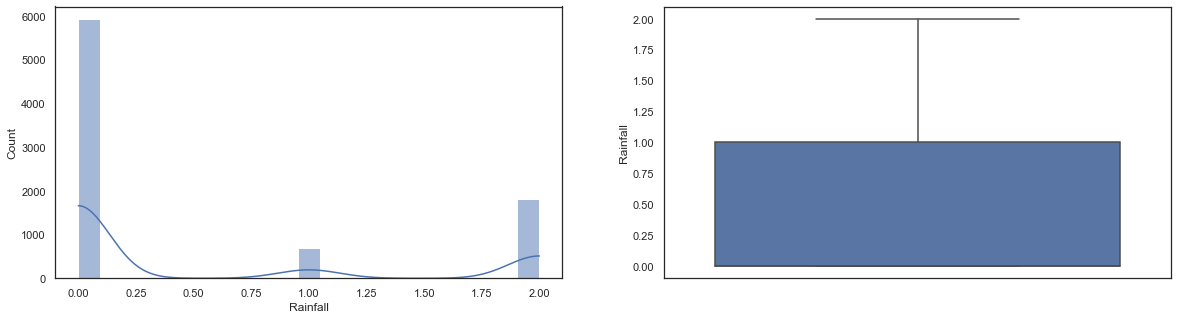

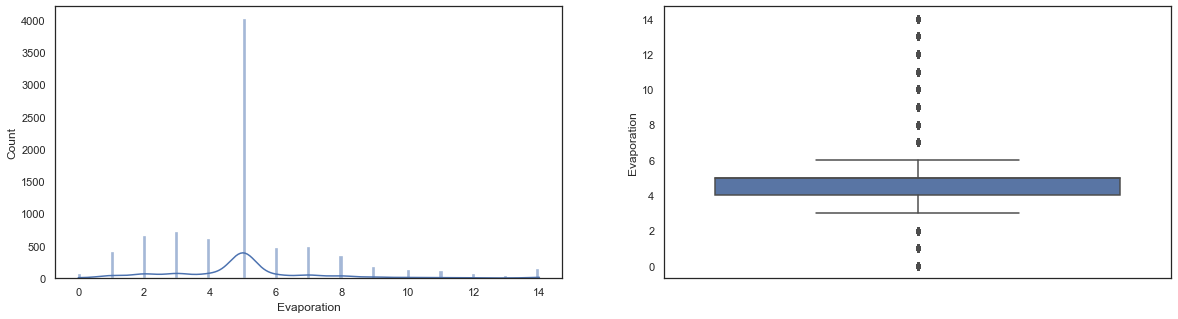

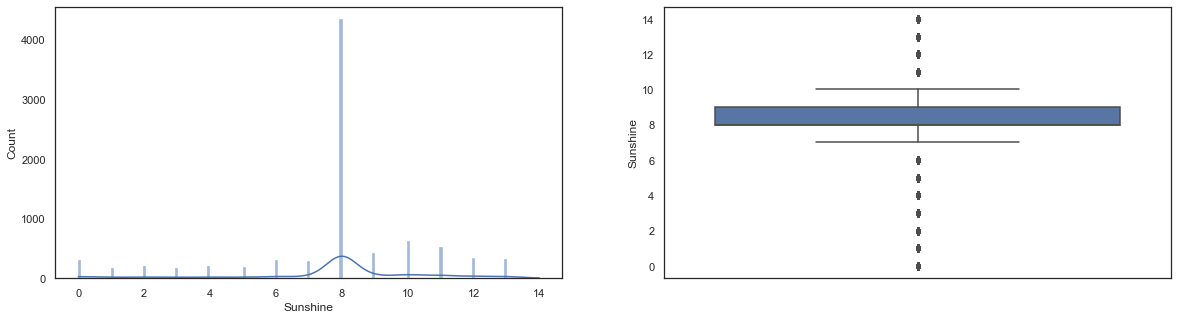

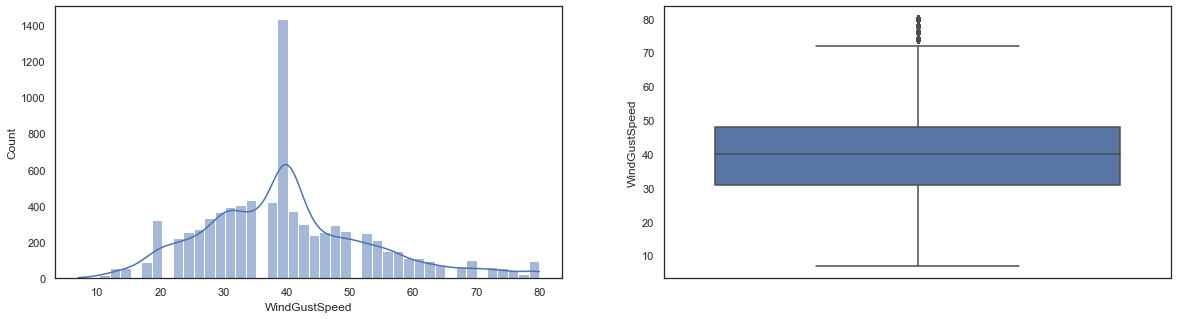

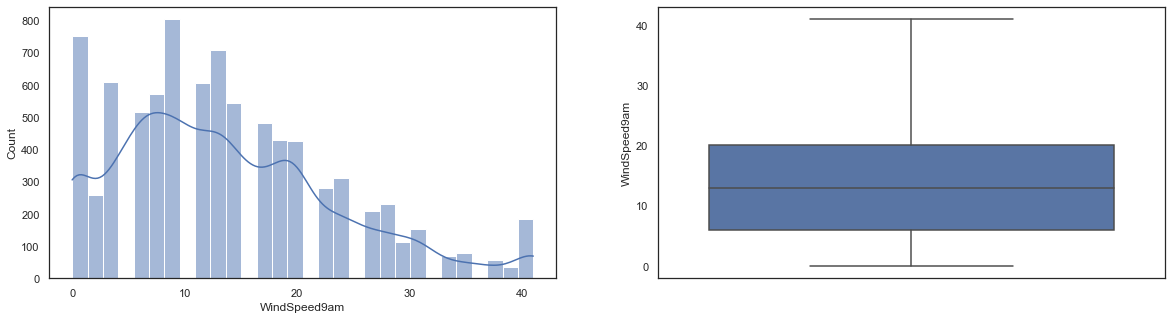

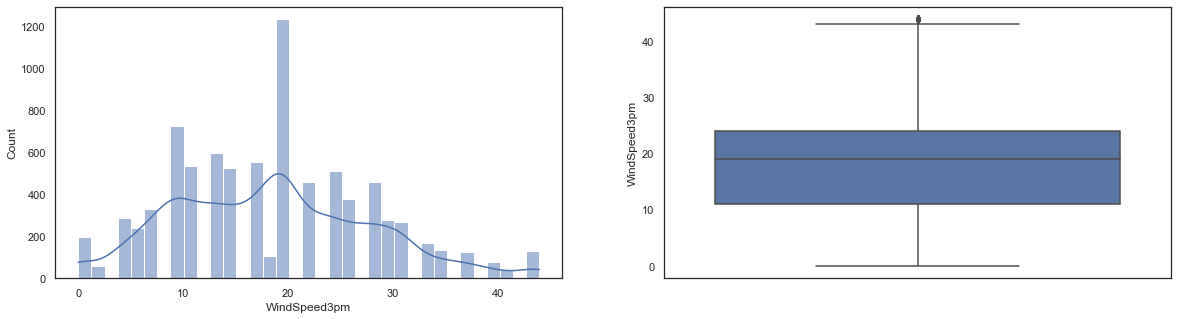

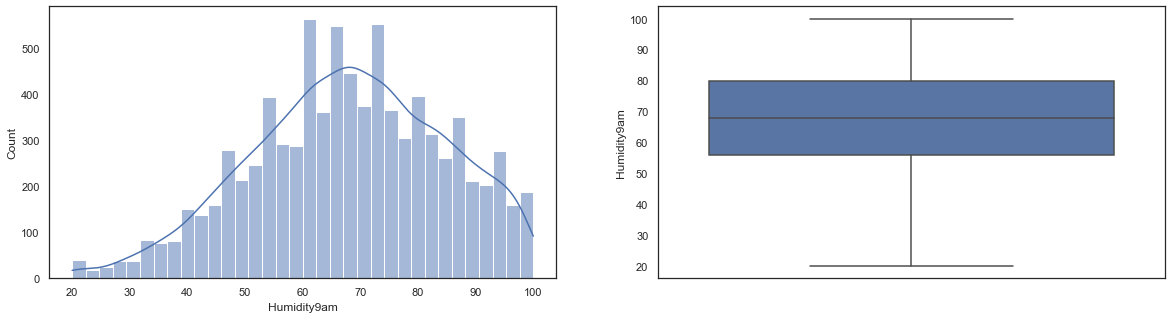

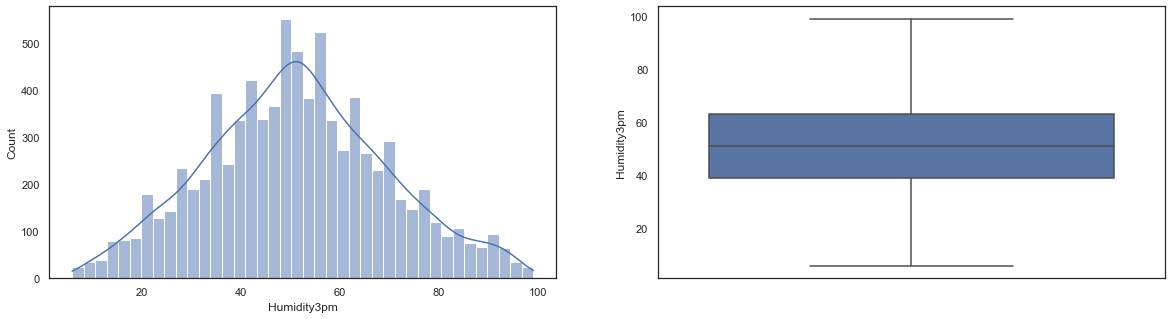

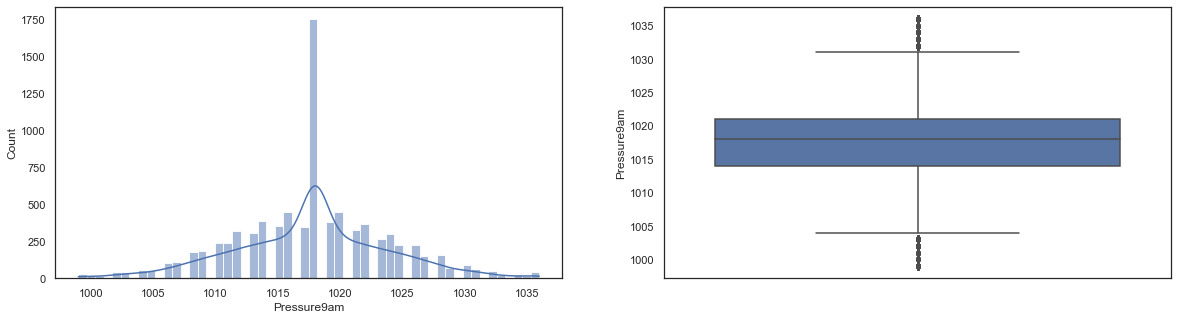

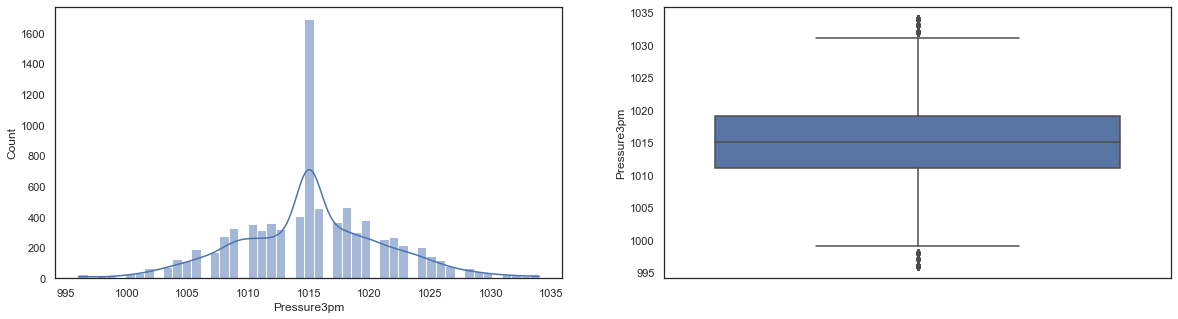

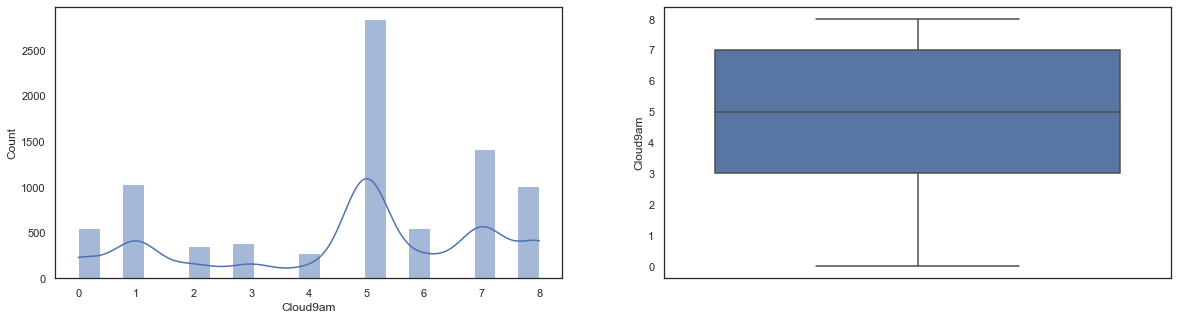

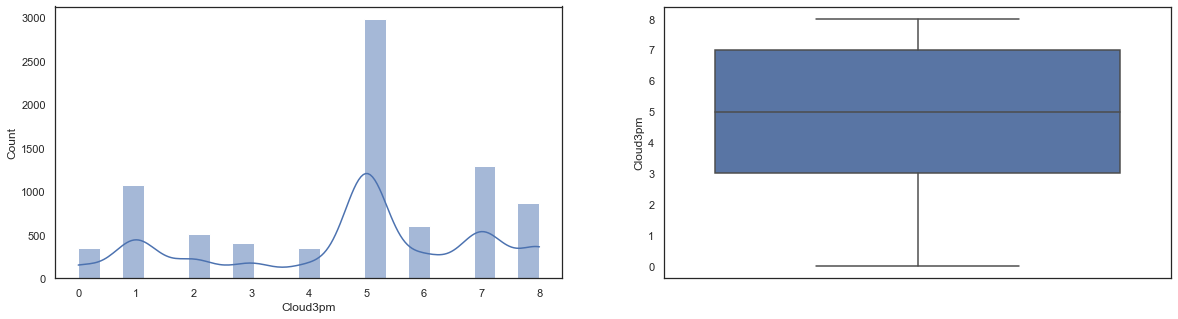

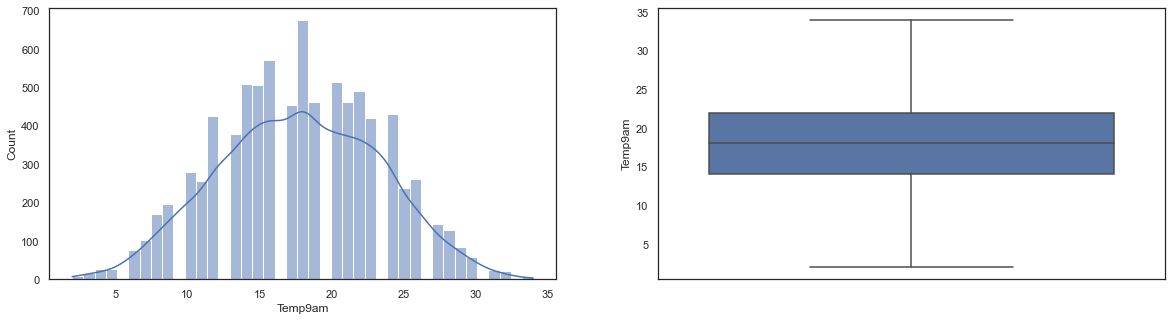

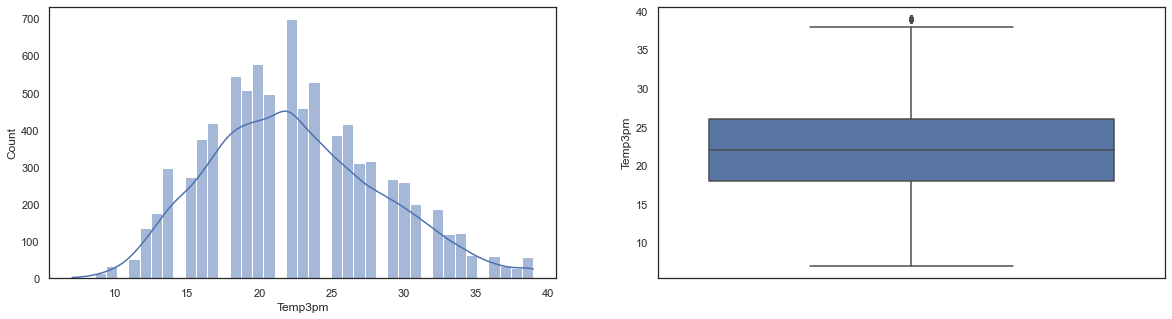

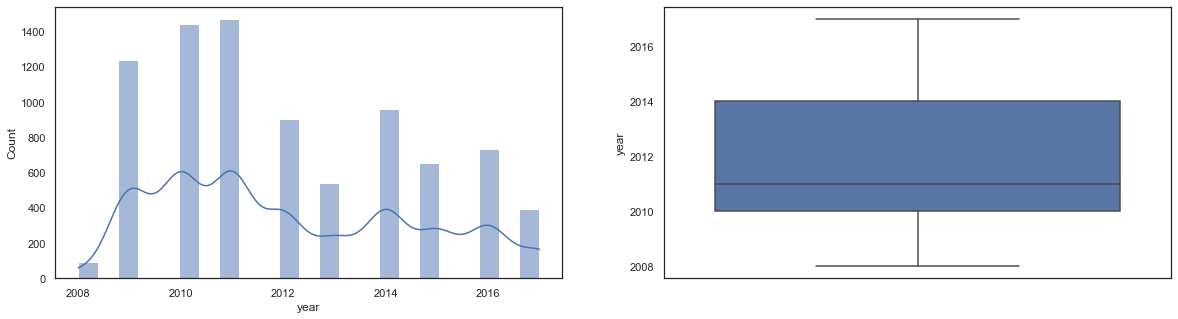

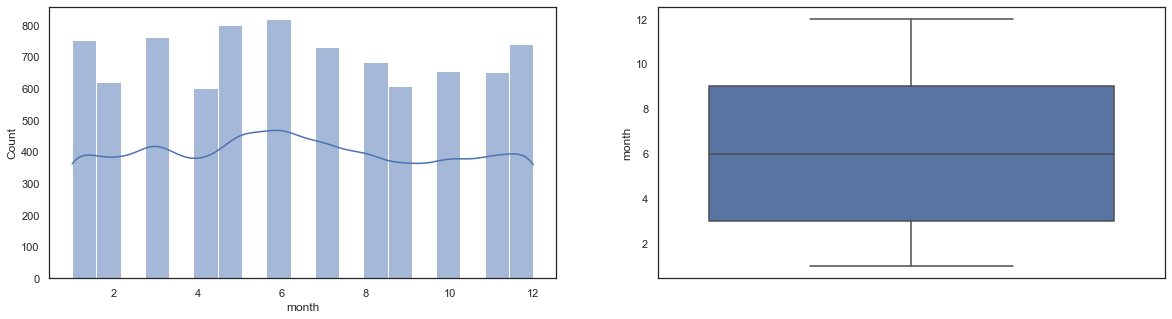

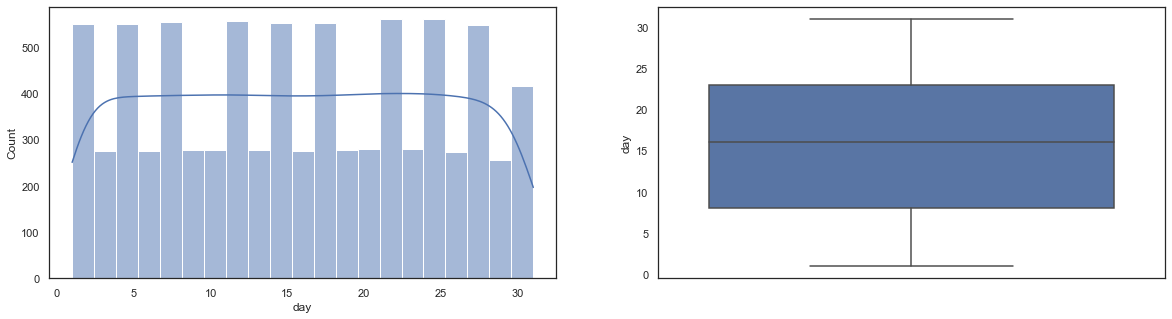

In [128]:
#PLots
for i in df2[numerical_features].columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.histplot(x=i,data=df2,kde=True)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=i,data=df2)
    plt.show()

### 3. Analysis of Catagorical data columns

In [240]:
df[categorical_features]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
8420,Uluru,E,SE,ENE,No,No
8421,Uluru,NNW,SE,N,No,No
8422,Uluru,N,SE,WNW,No,No
8423,Uluru,SE,SSE,N,No,No


In [276]:
#Encoding the Categorical data
LE=LabelEncoder()

df[categorical_features]=LE.fit_transform(df[categorical_features])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.90000,0.6,5.119906,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.10000,0.0,5.119906,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.70000,0.0,5.119906,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.00000,0.0,5.119906,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.30000,1.0,5.119906,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.40000,0.0,5.119906,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.30000,0.0,5.119906,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.90000,0.0,5.119906,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.00000,0.0,5.119906,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


In [150]:
#Lets make a function to visualize categorical data with regards to "RainTomorrow" as label
def Discrete_plots(dfrme, feature_c,invert_axis = False, label = "RainTomorrow"):
    fig, ax = plt.subplots(ncols= 2, figsize = (12,4))
    if invert_axis == False:
        sns.barplot(x = feature_c, y = label ,data=dfrme,ci=None)
    else:
        sns.barplot(y = feature_c, x = label ,data=dfrme,ci=None)
    if invert_axis == False:
        sns.countplot(x = feature_c, data=dfrme,hue="RainTomorrow",ax=ax[0])
    else:
        sns.countplot(y = feature_c, data=dfrme,hue="RainTomorrow",ax=ax[0])
    ax[0].set_title("Relationship between " + feature_c + " vs " + label)    
    ax[1].set_title("Chance of rain by {}".format(feature_c))
    ax[1].set_ylabel("Average(fraud_reported)")
    plt.tight_layout()

    plt.show()

In [405]:
#Lets make a function to visualize categorical data with regards to "Rainfall" as label
def Discrete_plots2(dfrme, feature_c,invert_axis = False, label = "Rainfall"):
    fig, ax = plt.subplots(ncols= 2, figsize = (12,4))
    if invert_axis == False:
        sns.barplot(x = feature_c, y = label ,data=dfrme,ci=None)
    else:
        sns.barplot(y = feature_c, x = label ,data=dfrme,ci=None)
    if invert_axis == False:
        sns.countplot(x = feature_c, data=dfrme,hue="Rainfall",ax=ax[0])
    else:
        sns.countplot(y = feature_c, data=dfrme,hue="Rainfall",ax=ax[0])
    ax[0].set_title("Relationship between " + feature_c + " vs " + label)    
    ax[1].set_title("Amount of rain by {}".format(feature_c))
    ax[1].set_ylabel("Average(fraud_reported)")
    plt.tight_layout()

    plt.show()

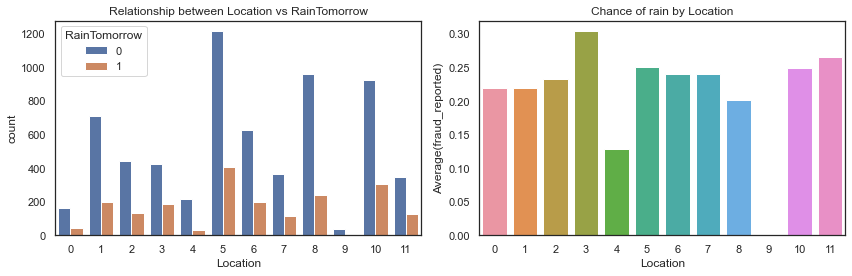

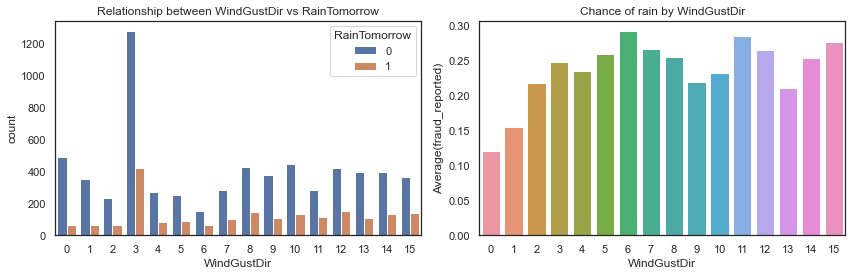

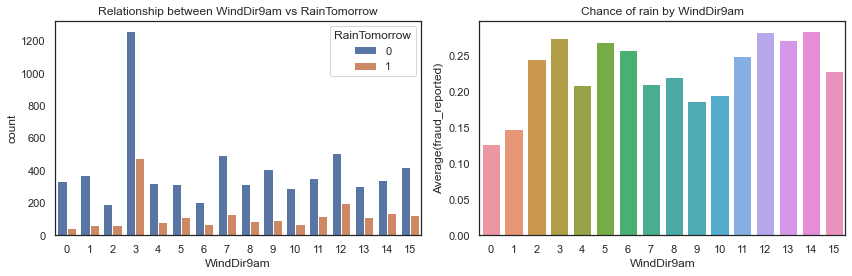

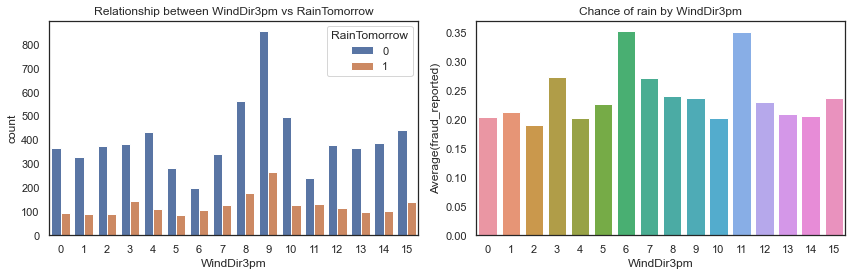

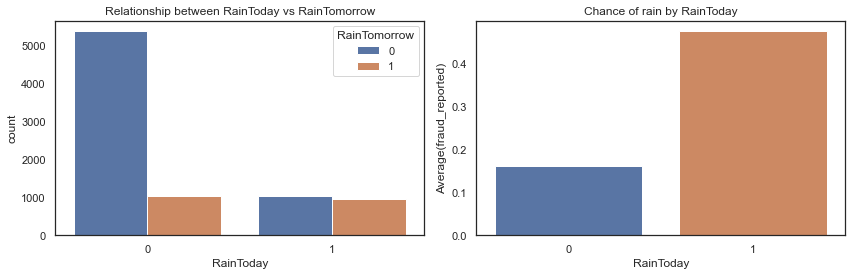

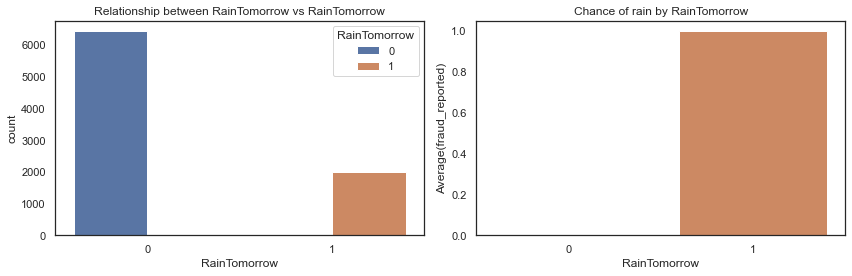

In [151]:
for i in df[categorical_features].columns:
    Discrete_plots(df[categorical_features],feature_c=i)

### 4. Analysis / comparisons between and of Individual features

<AxesSubplot:>

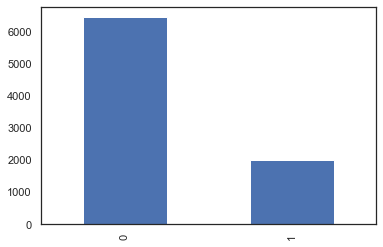

In [152]:
df['RainTomorrow'].value_counts().plot(kind='bar')

Dataset is imbalanced. balancinf needs to be done,.

a) Sunshine vs dffall:

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

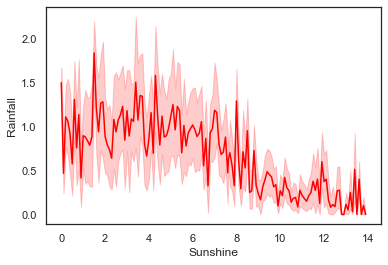

In [154]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='red')

b) Sunshine vs Evaporation:

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

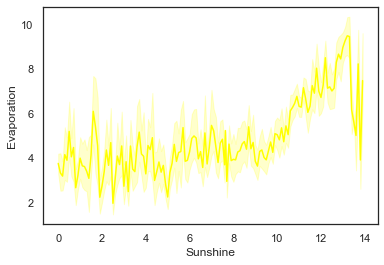

In [155]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='yellow')

### 5. Correlation of feature and label

<AxesSubplot:>

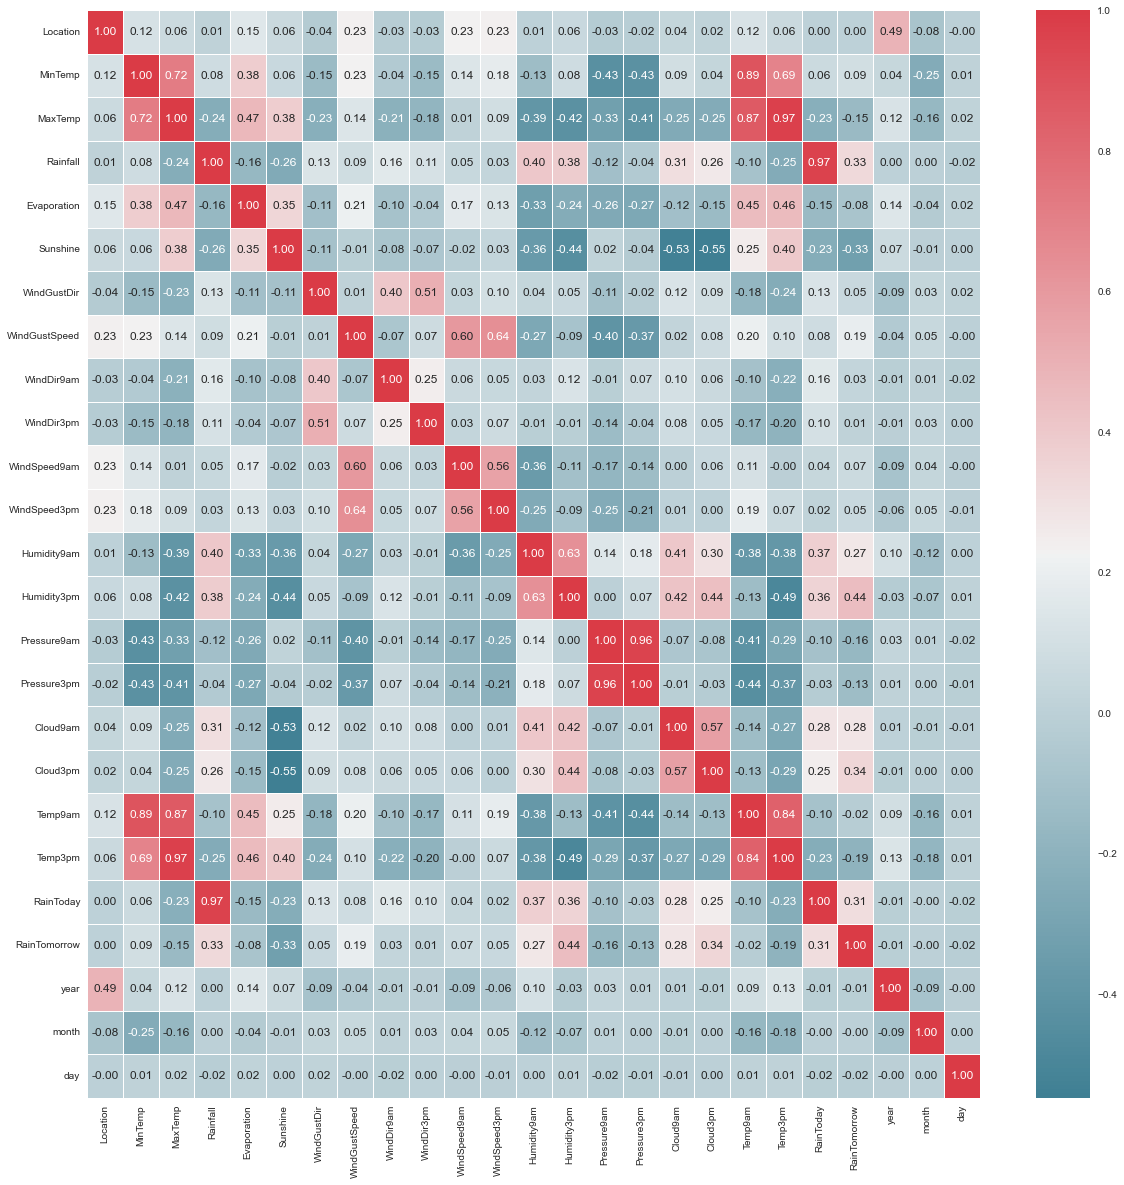

In [277]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), linewidths=0.5, annot=True, fmt=".2f", cmap = cmap)

#### Inference
- We see that the correlation is ranging betweeen -0.33 to 0.44. it is clearly not a extreme
- most of the features have very low correlation.
- only features like rainfall, sunshine, humidity, wind speed, rain today, cloudy @ 3pm and 9pm have some decent correlation. some of it being negaitive, which only means, that those features have an inverse correlation.

##### Angle2:
- In addition to the above, we find that Rainfall is mostly correlated with Rain today
- And Ofcourse the other climatic Factors in the dataset.

# Angle 1 Classification model to find out if it will RainTomorrow

## Pre Processing

- Lets split the data into features and label
- lets perform scaling
- Next, lets use K best features to find the top 12 features.
- Using sMOTE, we reduce the imbalance in the dataset.


In [201]:
X = df.drop(['RainTomorrow','Rainfall'],axis=1)
y = df['RainTomorrow']

In [202]:
scalar=StandardScaler()
scaled_features=features_with_outliers
df[scaled_features] = scalar.fit_transform(df[scaled_features])

In [203]:
#Checking if SMOTE is capable removing the Imbalance
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  


SM = SMOTE(random_state = 2)
X_train_res, y_train_res = SM.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1592
Before OverSampling, counts of label '0': 5148 

After OverSampling, the shape of train_X: (10296, 24)
After OverSampling, the shape of train_y: (10296,) 

After OverSampling, counts of label '1': 5148
After OverSampling, counts of label '0': 5148


#### We can use SMOTE to remove the imbalance in the dataset.

### Feature Importance: Using BestK Features method

In [204]:
#Using Kbest for reference
bestk = SelectKBest(score_func=f_classif,k=24)
fit=bestk.fit(X_train_res,y_train_res)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(24,'Score'))

     Feature_Name        Score
13    Pressure9am  3456.733613
17        Temp9am  2269.869051
5     WindGustDir  1608.604050
3     Evaporation  1410.875664
16       Cloud3pm  1346.470211
20           year  1215.656030
12    Humidity3pm  1184.898947
19      RainToday   571.321461
7      WindDir9am   446.221876
14    Pressure3pm   385.448348
2        Rainfall   366.734055
15       Cloud9am   256.167982
1         MaxTemp   131.861027
4        Sunshine   131.520350
10   WindSpeed3pm    49.925081
11    Humidity9am    33.860284
0         MinTemp    32.482896
6   WindGustSpeed    22.369674
18        Temp3pm     7.005393
9    WindSpeed9am     2.441370
8      WindDir3pm     0.635971
21          month     0.346526
22            day     0.183812
23            NaN     0.110463


In [205]:
df1=df.drop(['day','month','year','WindDir9am','WindDir3pm','Temp9am'],axis=1)

In [212]:
#Seperating Target and feature columns
y=df1['RainTomorrow']
X= df1.drop(['RainTomorrow','Rainfall'],axis=1)

## Building Model

In [215]:
#Function to choose best classification model, its metrics, and random state. 
#including the SMOTE balancing into this loop
mod=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0
max_f1score=0
for r_state in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=r_state,test_size=0.2)
    #For Balancing Dataset
    SM = SMOTE(random_state = r_state)
    X_train_res, y_train_res = SM.fit_resample(train_x, train_y.ravel())
    #Start the model building
    for i in mod:
        i.fit(X_train_res,y_train_res)
        pred_y = i.predict(test_x)
        acc_score=accuracy_score(test_y,pred_y)
        f1_Score=f1_score(test_y,pred_y)
        print(i,"Max_acc score for random state  ",r_state,"is",acc_score, "with f1 Score ", f1_Score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            max_f1score=f1_Score
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max Acc_score for random state ",final_state,"is",max_acc_score,"and best model is ",final_model, "with f1score as ",max_f1score)

LogisticRegression() Max_acc score for random state   0 is 0.772700296735905 with f1 Score  0.6087844739530134
KNeighborsClassifier() Max_acc score for random state   0 is 0.7560830860534125 with f1 Score  0.6044273339749759
DecisionTreeClassifier() Max_acc score for random state   0 is 0.8344213649851632 with f1 Score  0.6744457409568261
RandomForestClassifier() Max_acc score for random state   0 is 0.8783382789317508 with f1 Score  0.7515151515151515
LogisticRegression() Max_acc score for random state   1 is 0.7685459940652819 with f1 Score  0.5788336933045357
KNeighborsClassifier() Max_acc score for random state   1 is 0.7768545994065282 with f1 Score  0.6147540983606558
DecisionTreeClassifier() Max_acc score for random state   1 is 0.8439169139465875 with f1 Score  0.6835138387484958
RandomForestClassifier() Max_acc score for random state   1 is 0.8961424332344213 with f1 Score  0.7730220492866408
LogisticRegression() Max_acc score for random state   2 is 0.7887240356083086 with f1

- Based on the above prediction, we find that the best random_state at 42, and Random Forest classifier giving us the best result of  Accuracy score of 0.9074183976261128   and f1score of 0.7891891891891891

- let us proceed tp build the model with the above parameters and move towards Hyper Parameter tuning. 

### Initialising the Best model with the predicted best random state.

In [174]:
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=42,test_size=0.2)
SM = SMOTE(random_state = 42)
X_train_res, y_train_res = SM.fit_resample(train_x, train_y.ravel())
RFC=RandomForestClassifier()
RFC.fit(X_train_res,y_train_res)

RandomForestClassifier()

<AxesSubplot:>

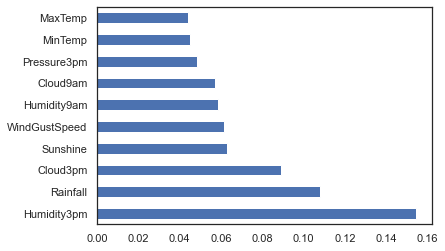

In [175]:
#Lets look at the feature importance
feature_imp = pd.Series(RFC.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [176]:
#Metrics
pred_y = RFC.predict(test_x)
acc_score=accuracy_score(test_y,pred_y)

In [177]:
print(f'Predictions are: ',pred_y)
print(f' \n Accuracy Score of: ',acc_score)


Predictions are:  [0 0 0 ... 1 0 0]
 
 Accuracy Score of:  0.9091988130563798


In [180]:
#Comparing Actual and Predicted Values.
compare=pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
compare.sample(10)

,Actual,Predicted
7204,1,1
1427,0,0
5794,1,1
5909,1,1
3102,0,0
6068,0,0
683,1,1
1402,0,0
2651,0,0
3704,0,0


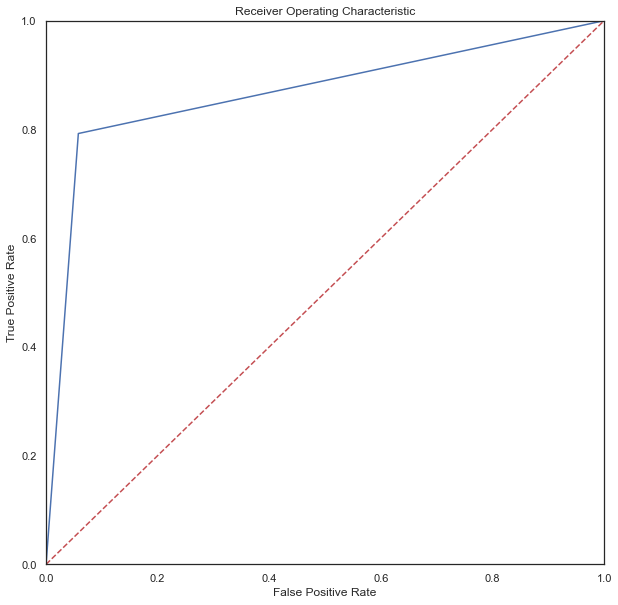

In [181]:
#Ploting ROCb
fpr, tpr, threshold = roc_curve(test_y, pred_y)

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
#plt.legend(loc = 'lower right', )
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyperparameter Tuning

In [182]:
#initialising range of parameters for sequential testing
n_estimators = [int(x) for x in np.linspace(start=20, stop=150, num=25)]
max_depth = [int(x) for x in np.linspace(20, 150, num=25)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [183]:
#Fitting the above range into previously found model
RFC_HPT = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=RFC_HPT, param_distributions=param_dist, cv=5, random_state=42)

In [184]:
rf_cv.fit(X_train_res,y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [20, 25, 30, 36, 41, 47,
                                                      52, 57, 63, 68, 74, 79,
                                                      85, 90, 95, 101, 106, 112,
                                                      117, 122, 128, 133, 139,
                                                      144, 150],
                                        'n_estimators': [20, 25, 30, 36, 41, 47,
                                                         52, 57, 63, 68, 74, 79,
                                                         85, 90, 95, 101, 106,
                                                         112, 117, 122, 128,
                                                         133, 139, 144, 150]},
                   random_state=42)

In [185]:
print(f'best score is ',rf_cv.best_score_)
print(f'\nBest parameters are ', rf_cv.best_params_)

best score is  0.91337890625

Best parameters are  {'n_estimators': 139, 'max_depth': 112}


In [186]:
RFC_best = RandomForestClassifier(max_depth=112, n_estimators=139, random_state=42)
RFC_best.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=112, n_estimators=139, random_state=42)

In [187]:
Y_pred_RFC_best = RFC_best.predict(test_x)

In [188]:
Y_pred_RFC_bestt = RFC_best.predict_proba(test_x)
Y_pred_RFC_bestt

array([[0.86330935, 0.13669065],
       [0.52517986, 0.47482014],
       [0.8705036 , 0.1294964 ],
       ...,
       [0.48201439, 0.51798561],
       [0.94964029, 0.05035971],
       [0.8705036 , 0.1294964 ]])

In [189]:
print('Random Forest Classifier with HPT:')
print('Accuracy score:', round(accuracy_score(test_y, Y_pred_RFC_best) * 100, 2))
print('F1 score:', round(f1_score(test_y, Y_pred_RFC_best) * 100, 2))

Random Forest Classifier with HPT:
Accuracy score: 90.74
F1 score: 79.14


In [192]:
compare2=pd.DataFrame({'Actual':test_y,'Predicted':Y_pred_RFC_best})
compare2.sample(10)

,Actual,Predicted
2227,0,0
6940,0,0
5462,1,1
4264,0,0
7713,0,0
2002,0,0
3355,1,1
4610,0,0
5040,1,1
5119,0,0


## Hence we can see that we have fine tuned the model to compensate for overfitting.
- Let us now look at other metrics

<h3><font color='maroon'><u>Metrics for the Classification Problem</u></font></h3>

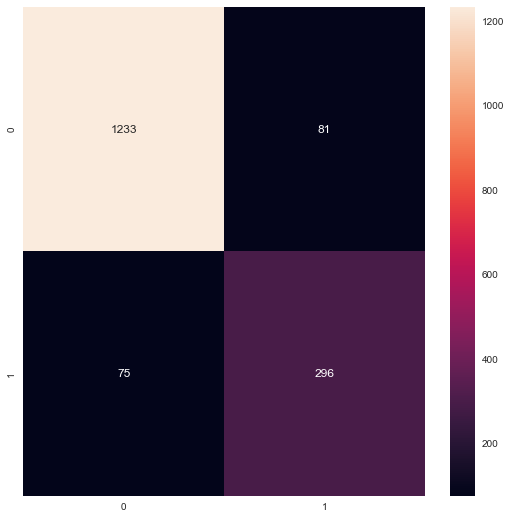

In [195]:
#After the HPT, lets look at the confusion matrix, to look at the number of True Positives...
Conf_mat = confusion_matrix(test_y, Y_pred_RFC_best)

plt.style.use('seaborn')
plt.figure(figsize=(9, 9))
sns.heatmap(Conf_mat, annot=True, fmt='d')
plt.show()

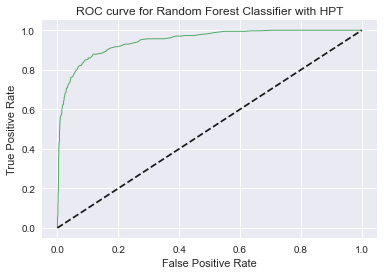

In [198]:
#Lets look at the ROC of The RAndom Forest classifier with HPT
fpr, tpr, thresholds = roc_curve(test_y, y_predd2)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random Forest Classifier with HPT')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

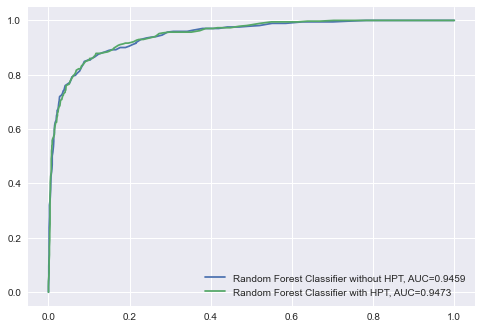

In [196]:
#set up plotting area
plt.figure(0).clf()

#fit ROC before 

y_predd = RFC.predict_proba(test_x)[:, 1]
fpr1, tpr1, _ = roc_curve(test_y, y_predd)
auc1 = round(roc_auc_score(test_y, y_predd), 4)
plt.plot(fpr1,tpr1,label="Random Forest Classifier without HPT, AUC="+str(auc1))

#fit gradient boosted model and plot ROC curve

y_predd2 = RFC_best.predict_proba(test_x)[:, 1]
fpr2, tpr2, _ = roc_curve(test_y, y_predd2)
auc2 = round(roc_auc_score(test_y, y_predd2), 4)
plt.plot(fpr2,tpr2,label="Random Forest Classifier with HPT, AUC="+str(auc2))

#add legend
plt.legend()

In [199]:
auc2

0.9473

In [200]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFC_best, X_train_res, y_train_res, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.859375   0.89697266 0.94042969 0.93261719 0.9375    ]
Average cross-validation score: 0.91337890625


# II. Angle Two- Amount of Rainfall in the area

In [278]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.90000,0.6,5.119906,7.632205,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.10000,0.0,5.119906,7.632205,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.70000,0.0,5.119906,7.632205,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.00000,0.0,5.119906,7.632205,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.30000,1.0,5.119906,7.632205,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.40000,0.0,5.119906,7.632205,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.30000,0.0,5.119906,7.632205,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.90000,0.0,5.119906,7.632205,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.00000,0.0,5.119906,7.632205,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6,24


In [279]:
X1 = df.drop(['Rainfall'],axis=1)
y1 = df['Rainfall']

In [297]:
features_with_outliers=['MinTemp', 'MaxTemp', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [299]:
scalar=StandardScaler()
scaled_features=features_with_outliers
X1[scaled_features] = scalar.fit_transform(X1[scaled_features])

In [313]:
#Using Kbest for reference

bestk = SelectKBest(score_func=f_classif,k=24)
fit=bestk.fit(X1,y1)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X1.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(24,'Score'))

     Feature_Name      Score
19      RainToday        inf
11    Humidity9am  96.852412
12    Humidity3pm  81.003731
20   RainTomorrow  54.918212
15       Cloud9am  49.320382
16       Cloud3pm  37.206578
4        Sunshine  36.644839
18        Temp3pm  34.110919
2         MaxTemp  31.766442
3     Evaporation  17.940633
7      WindDir9am  13.404308
5     WindGustDir  11.374213
17        Temp9am  10.214704
13    Pressure9am   8.515751
10   WindSpeed3pm   6.910989
8      WindDir3pm   6.826909
6   WindGustSpeed   6.498961
1         MinTemp   5.803349
21           year   5.408855
9    WindSpeed9am   5.340209
22          month   4.346317
14    Pressure3pm   2.893923
0        Location   2.387045
23            day   1.066530


Now lets condider only the top 13 for this regression

In [315]:
X1=X1.drop(['day','Location','Pressure3pm','month','WindSpeed9am','year','MinTemp','WindGustSpeed','WindDir3pm','WindSpeed3pm'],axis=1)

In [324]:
mod=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(), RandomForestRegressor()]
max_r2score=0
for r_state in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(X1,y1,random_state=r_state,test_size=0.2)
    for i in mod:
        i.fit(train_x,train_y)
        pred_y = i.predict(test_x)
        r2_sc=r2_score(test_y,pred_y)
        print("R2 score corresponding to random state ",r_state,"is",r2_sc)
        if r2_sc>max_r2score:
            max_r2score=r2_sc
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max R2 score corresponding to random state ",final_state,"is",max_r2score,"and best model is ",final_model)

R2 score corresponding to random state  1 is 0.9406754750852643
R2 score corresponding to random state  1 is 0.27969920523716973
R2 score corresponding to random state  1 is 0.9258101162821009
R2 score corresponding to random state  1 is 0.9588207921133396
R2 score corresponding to random state  2 is 0.9431092718115062
R2 score corresponding to random state  2 is 0.32534737693082294
R2 score corresponding to random state  2 is 0.919937942683094
R2 score corresponding to random state  2 is 0.9591074885072968
R2 score corresponding to random state  3 is 0.9315777577465318
R2 score corresponding to random state  3 is 0.30204355351616674
R2 score corresponding to random state  3 is 0.9093479668914213
R2 score corresponding to random state  3 is 0.9527475458297852
R2 score corresponding to random state  4 is 0.9362138514538572
R2 score corresponding to random state  4 is 0.2676213907397198
R2 score corresponding to random state  4 is 0.9093361741741243
R2 score corresponding to random state

In [350]:
train_x,test_x,train_y,test_y=train_test_split(X1,y1,random_state=50,test_size=0.2)
RFR=RandomForestRegressor()
RFR.fit(train_x,train_y)
pred_y = RFR.predict(test_x)
r2_sc=r2_score(test_y,pred_y)
print(f'Model r2score is ',r2_sc)
print(f'\n\n The Predicted test label values are',pred_y)

Model r2score is  0.964884199037022


 The Predicted test label values are [0.004      2.391      0.00548722 ... 2.456      0.40630788 0.        ]


## Hyper Parameter Tuning
- Involves Both Grid search and Randomised search CV.
- Fitting the Model with the best params on the best CV model.
- Finally assessed using the Cross Validation Score avg.

### 1. Grid Search CV

In [381]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
g_search=GridSearchCV(RFR,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(train_x,train_y)
n_neighbor=g_search.best_params_
n_neighbor

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 15}

#### Lets now apply the above params into GridSearchCV

In [389]:
best_param_grid = {  'bootstrap': [True], 'max_depth': [None], 'max_features': ['auto'], 'n_estimators': [15]}
best_g_search=GridSearchCV(RFR,param_grid = best_param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

best_g_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'n_estimators': [15]},
             return_train_score=True)

In [396]:
GSCV_pred_y = RFR.predict(test_x)
r2_sc_gs=r2_score(test_y,GSCV_pred_y)
r2_sc_gs

0.964884199037022

### 2. RandomizedSearchCV 

In [343]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 

max_features = ['auto', 'log2']

max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 

max_depth.append(None)

bootstrap = [True, False]
r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

In [345]:
print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [347]:
rfr_random = RandomizedSearchCV(estimator=RFR, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [349]:
print(rfr_random.best_params_)


{'n_estimators': 15, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


#### Lets now apply the above params into RandomisedSearchCV

In [376]:
bestr_grid = {'n_estimators': [15],

               'max_features': ['auto'],

               'max_depth': [None],

               }

In [387]:
best_rfr_random = RandomizedSearchCV(estimator=RFR, param_distributions=bestr_grid)

best_rfr_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None],
                                        'max_features': ['auto'],
                                        'n_estimators': [15]})

In [397]:
RSCV_pred_y = RFR.predict(test_x)
r2_sc_rs=r2_score(test_y,RSCV_pred_y)
r2_sc_rs

0.964884199037022

# Comparison

In [401]:
#comp=pd.DataFrame({'R2score of Random forest':'0.9647331639308632' ,'R2Score of RF with GridsearchCV':r2_sc_gs,'R2Score of RF with RandomisedsearchCV':r2_sc_rs})
print(f'R2score of Random forest: 0.9647331639308632')
print(f'R2Score of RF with GridsearchCV:',r2_sc_gs)
print(f'R2Score of RF with RandomisedsearchCV:',r2_sc_rs)


R2score of Random forest: 0.9647331639308632
R2Score of RF with GridsearchCV: 0.964884199037022
R2Score of RF with RandomisedsearchCV: 0.964884199037022


### Hence we achieved the best r2score with GridsearchCV


#### Comparing Predicted vs Actual values

In [404]:
#Comparing Actual and Predicted Values.
compare=pd.DataFrame({'Actual':test_y,'Predicted with only Random forest Reg':pred_y ,'Predicted  WithRandom Forst Reg and HPT':GSCV_pred_y})
compare.round(1)

,Actual,Predicted with only Random forest Reg,Predicted WithRandom Forst Reg and HPT
5439,0.0,0.0,0.0
1191,2.5,2.4,2.4
3852,0.0,0.0,0.0
7556,0.0,0.0,0.0
1841,2.5,2.5,2.5
...,...,...,...
6849,0.0,0.1,0.1
7786,0.0,0.1,0.1
3157,2.5,2.5,2.5
1888,0.8,0.4,0.4


# Result
- What we see above is a comparison where we find that we have 96.4% accuracy in predicting the actual amount of rainfall.
- What we see below is the best fit line of the Predicted vs Actual values, where the slope is ~1
- Hence we can summarise that we built a Good Regression model.
- End of Angle 2

Text(0, 0.5, 'Predicted Y')

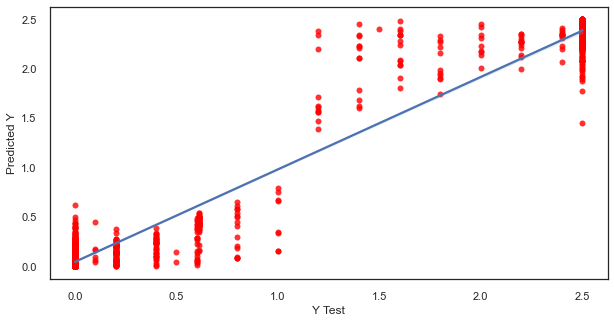

In [407]:
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=GSCV_pred_y,scatter_kws={'color':'red'})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')